In [5]:
import urllib
import os
import operator
import pathlib
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [6]:
DATA_ROOT = '../data/'
FIGURES_ROOT = '../figures/crime'

READDIR_ROOT = os.path.join(DATA_ROOT, 'raw')
WRITEDIR_ROOT = os.path.join(DATA_ROOT, 'interim/crime')

readfile_crime = os.path.join(READDIR_ROOT, 'crime/crime-incidents.csv')

readfile_sam = os.path.join(READDIR_ROOT, 'boston/sam-addresses.csv')
readfile_zipshapes = os.path.join(READDIR_ROOT, 'shapefile/zipcodes/ZIP_Codes.shp')
readfile_cityshape = os.path.join(READDIR_ROOT, 'shapefile/city-boundary/City_of_Boston_Boundary.shp')
readfile_streetshapes = os.path.join(READDIR_ROOT, 'shapefile/street-segments/Boston_Street_Segments.shp')
readfile_tractshapes = os.path.join(READDIR_ROOT, 'shapefile/census-tracts/Census_2010_Tracts.shp')
readfile_hoodshapes = os.path.join(READDIR_ROOT, 'shapefile/boston-neighborhoods/Boston_Neighborhoods.shp')
readfile_zonesubshapes = os.path.join(READDIR_ROOT, 'shapefile/zoning-subdistricts/Zoning_Subdistricts.shp')

print(
    'readfile paths for datasets used in this notebook are:\n\t{}\n\t{}\n\t{}'.format(
        readfile_crime, readfile_sam, readfile_zipshapes, WRITEDIR_ROOT
    )
)


readfile paths for datasets used in this notebook are:
	../data/raw\crime/crime-incidents.csv
	../data/raw\boston/sam-addresses.csv
	../data/raw\shapefile/zipcodes/ZIP_Codes.shp


In [7]:
DATA_ROOT = '../data/'
DATA_DIR = os.path.join(DATA_ROOT, 'raw/boston')
readfile_public_k12_schools = os.path.join(DATA_DIR, 'public-k12-schools.csv')

In [9]:
df_public_k12_schools = pd.read_csv(readfile_public_k12_schools)
df_public_k12_schools.head(3)

,X,Y,OBJECTID_1,OBJECTID,BLDG_ID,BLDG_NAME,ADDRESS,CITY,ZIPCODE,CSP_SCH_ID,SCH_ID,SCH_NAME,SCH_LABEL,SCH_TYPE,SHARED,COMPLEX,POINT_X,POINT_Y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,4061,Guild Elementary,Guild,ES,,,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,,,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,4322,Otis Elementary,Otis,ES,,,782112.823908,2.962122e+06


In [12]:
#Inspect Datatypes
df_public_k12_schools.dtypes

X             float64
Y             float64
OBJECTID_1      int64
OBJECTID        int64
BLDG_ID         int64
BLDG_NAME      object
ADDRESS        object
CITY           object
ZIPCODE         int64
CSP_SCH_ID      int64
SCH_ID          int64
SCH_NAME       object
SCH_LABEL      object
SCH_TYPE       object
SHARED         object
COMPLEX        object
POINT_X       float64
POINT_Y       float64
dtype: object

In [13]:
#Map plot prep

# read in SAM address data and related shapefiles
df_crime = pd.read_csv(readfile_crime, dtype=str)
df_sam = pd.read_csv(readfile_sam, dtype=str)
gdf_zips = gpd.read_file(readfile_zipshapes)
gdf_boston = gpd.read_file(readfile_cityshape)
gdf_streets = gpd.read_file(readfile_streetshapes)
gdf_tracts = gpd.read_file(readfile_tractshapes)
gdf_hoods = gpd.read_file(readfile_hoodshapes)
gdf_zonesubs = gpd.read_file(readfile_zonesubshapes)

# convert SAM data lat/lon values to floats
df_sam[['X', 'Y']] = df_sam[['X', 'Y']].astype(float)
# convert crime data lat/lon values to floats
#df_crime[['Lat', 'Long']] = df_crime[['Lat', 'Long']].astype(float)

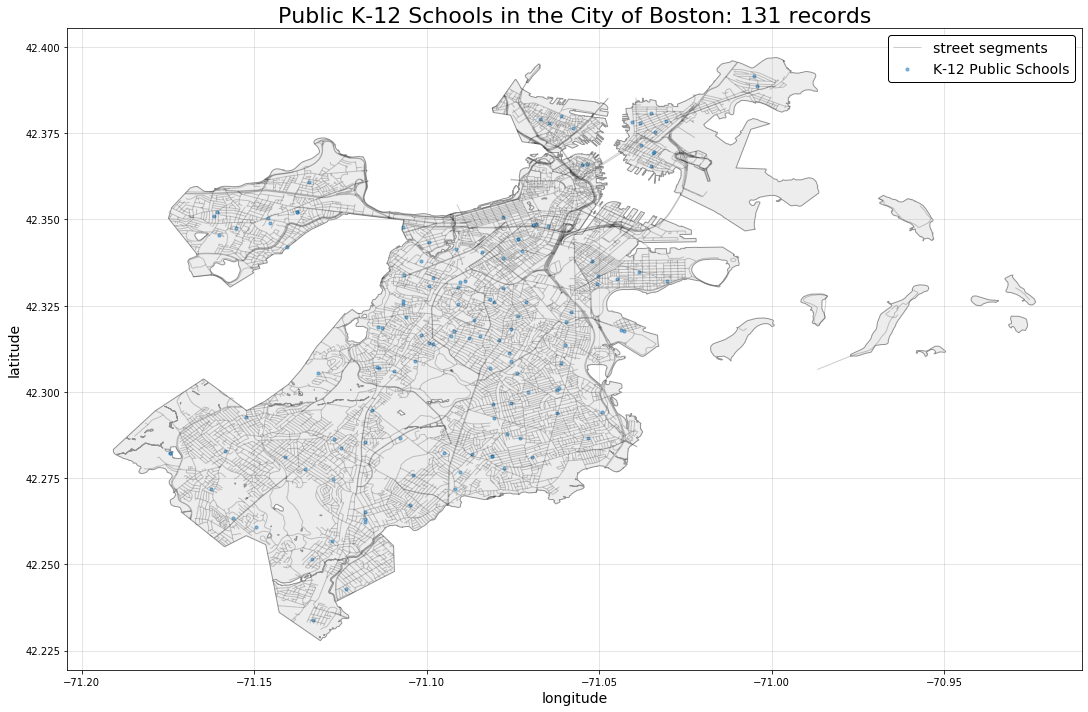

In [17]:
# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,10))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='k', linewidth=1, alpha=0.2, label='street segments')
plt.title(
    'Public K-12 Schools in the City of Boston: 131 records',
    fontsize=22
)
plt.scatter(
    df_public_k12_schools['X'], df_public_k12_schools['Y'],
    
    color='tab:blue', alpha=.5, s=10,
    label='K-12 Public Schools'
)
plt.xlabel('longitude', fontsize=14)
plt.ylabel('latitude', fontsize=14)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
plt.show();